## Linear Algebra for AI and ML

### Assignment 2

### Question 7

### Shrinivas Khiste: 19CS30043

In [ ]:
import numpy as np

### Generating random 30x10 and 30x1 matrices

In [ ]:
A = np.random.randn(30,10)
b = np.random.randn(30,1)

### Calculating Rank

In [ ]:
rank = np.linalg.matrix_rank(A)
rank

10

As this is a full column rank matrix. We can use it for the further calculations

### Formula Solution
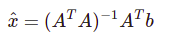



In [ ]:
a_plus = np.linalg.inv(np.dot(np.transpose(A), A))
x_hat = np.dot(a_plus,np.dot(np.transpose(A),b))
x_hat

array([[-0.33745943],
       [ 0.1278939 ],
       [ 0.02624531],
       [-0.07951961],
       [ 0.02518464],
       [-0.43989712],
       [ 0.07961641],
       [ 0.162793  ],
       [-0.38175498],
       [ 0.02733649]])

### Iterative Solution

$$\displaystyle x^{(k+1)}=x^{(k)}-\frac{1}{||A||^2}A^T(Ax^{(k)}-b)$$

In [ ]:
def iterative_algo(A,b,x):
  diff = np.dot(A,x)-b
  norm = np.linalg.norm(A, 2)
  x_next = x - (np.dot(np.transpose(A),diff))/(norm**2)
  return x_next

In [ ]:
x = np.zeros((10,1))
dists = []
for i in range(100):
  x = iterative_algo(A,b,x)
  dist = np.linalg.norm(x - x_hat)
  dists.append(dist)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

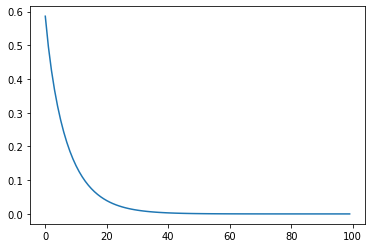

In [ ]:
plt.plot(dists)

From the above plot, we can see that the iterative solution converges to the formula solution. 

Mathematical proof is in there in the solution. 

In [ ]:
print("Formula LS solution:\n",x_hat)
print("Iterative LS Solution:\n",x)
print("Norm of their difference: ",np.linalg.norm(x_hat-x))

Formula LS solution:
 [[-0.33745943]
 [ 0.1278939 ]
 [ 0.02624531]
 [-0.07951961]
 [ 0.02518464]
 [-0.43989712]
 [ 0.07961641]
 [ 0.162793  ]
 [-0.38175498]
 [ 0.02733649]]
Iterative LS Solution:
 [[-0.33745899]
 [ 0.12789437]
 [ 0.02624539]
 [-0.07951915]
 [ 0.02518509]
 [-0.43989621]
 [ 0.07961578]
 [ 0.16279288]
 [-0.38175398]
 [ 0.02733634]]
Norm of their difference:  1.7543554572932945e-06


Hence the iterative LS converges to the formula solution. 